## Observations and Insights 

Summary analysis with 3 observations and insights:

1) For mouse s185, the tumor size decreased with the time, while using Capomulin as drug. This indicates that Capomulin could prove to be an effective drug regimen.
2) The correlation between the weight of the mice and the tumor size came to 0.84. This indicates a positive correlation meaning as weight of the mice decrease, the tumor size also decreased.
3) Out of the 4 drug regimens, Capomulin and Ramicane seem to be most effective at decreasing tumor size comparing to other 2 drugs (Infubinol and Ceftamin). It would be worth to further analyze the drugs Capomulin and Ramicane to find out the most effective cure for cancer.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count=combined_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df=combined_df.loc[combined_df['Mouse ID']=='g989',:]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_df)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_vol=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median_vol=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance_vol=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std_vol=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem_vol=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary dataframe.
summary_df= pd.DataFrame({"Mean Tumor Volume":mean_vol, 
                            "Median Tumor Volume":median_vol, 
                           "Variance of Tumor Volume ":variance_vol, 
                           "Standard Deviation of Tumor Volume ":std_vol, 
                           "SEM of Tumor Volume":sem_vol})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Count the number of timepoints for each Drug using value_counts
timepoints_count=clean_df["Drug Regimen"].value_counts()
timepoints_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Timepoints per Treatment')

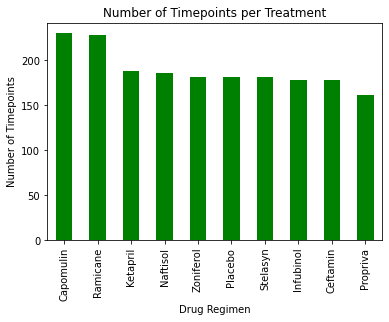

In [13]:
# Create the first bar plot by using Pandas's `DataFrame.plot()` method.
plot_pandas = timepoints_count.plot.bar(color='g')  

# Set the xlabel, ylabel, and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints per Treatment")

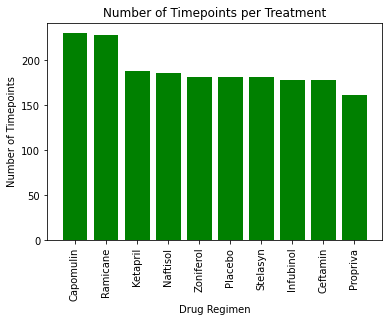

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis= timepoints_count.index.values
y_axis=timepoints_count.values

plt.bar(x_axis, y_axis, color='g', align="center")

plt.title("Number of Timepoints per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.xticks(rotation="vertical")

plt.show()

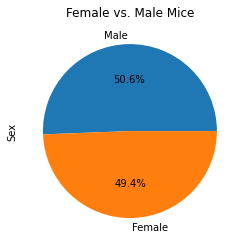

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = clean_df["Sex"].value_counts()

plt.title("Female vs. Male Mice")
gender_distribution.plot.pie(autopct= "%1.1f%%")
plt.show()

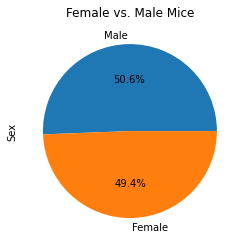

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = gender_distribution.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Female vs. Male Mice')
plt.ylabel('Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(clean_df.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df = pd.merge(clean_df, last_timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
final_df

Capomulin_df = final_df.loc[final_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = final_df.loc[final_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = final_df.loc[final_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = final_df.loc[final_df["Drug Regimen"] == "Ceftamin", :]

combined_df=pd.concat([Capomulin_df,Ramicane_df,Infubinol_df,Ceftamin_df])
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,b128,Capomulin,Female,9,22,45,38.982878,2
24,b742,Capomulin,Male,7,21,45,38.939633,0
61,f966,Capomulin,Male,16,17,20,30.485985,0
64,g288,Capomulin,Male,3,19,45,37.074024,1
66,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
224,x226,Ceftamin,Male,23,28,0,45.000000,0
229,x581,Ceftamin,Female,19,28,45,64.634949,3
232,x822,Ceftamin,Male,3,29,45,61.386660,3
239,y769,Ceftamin,Female,6,27,45,68.594745,4


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for each in treatments:
    vol = combined_df.loc[combined_df["Drug Regimen"]== each]["Tumor Volume (mm3)"]
    tumor_vol.append(vol)

    quartile = vol.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper-lower 
    # Determine outliers using upper and lower bounds
    lbound = lower - (1.5*iqr)
    ubound = upper + (1.5*iqr)
    outliers = vol.loc[(vol > ubound) | (vol < lbound)]
    if len(outliers) > 0:
        print(f"The outliers for {each} are {outliers}.")
    

The outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.


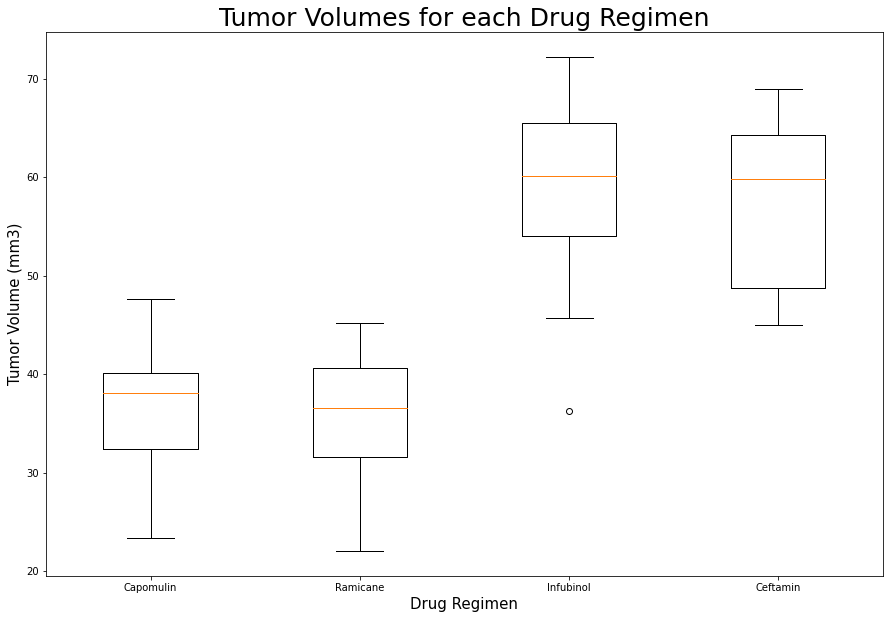

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots(figsize=(15, 10))
plt.boxplot(tumor_vol, labels = treatments)
plt.xlabel("Drug Regimen", fontsize = 15)
plt.ylabel("Tumor Volume (mm3)", fontsize = 15)
plt.title("Tumor Volumes for each Drug Regimen",fontsize =25)
plt.show()


## Line and Scatter Plots

In [54]:
#Identify a mouse treated with Capomulin
analysis_plot_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
analysis_plot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [57]:
mouse185=clean_df.loc[clean_df["Mouse ID"]=="s185"]
mouse185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


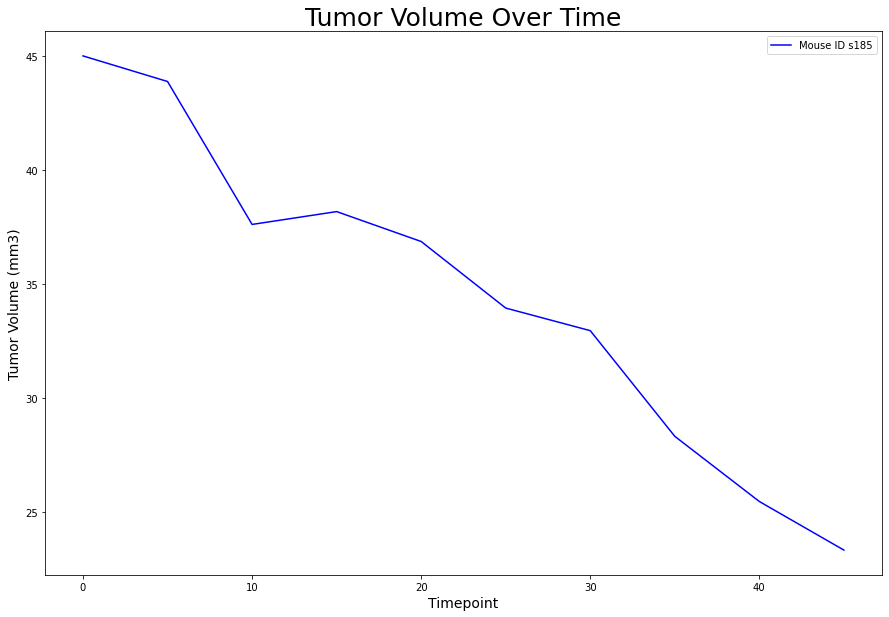

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x = mouse185["Timepoint"]
y = mouse185["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.plot(x, y, color="blue",label="Mouse ID s185")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time",fontsize =25)
plt.xlabel("Timepoint",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)
plt.show()

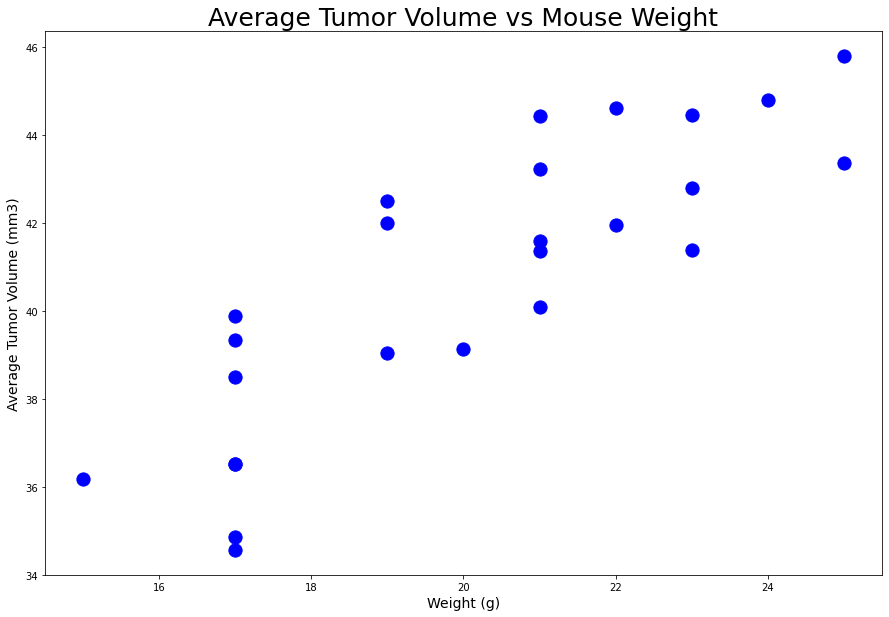

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig, ax = plt.subplots(figsize=(15, 10))
avg_capm_vol =analysis_plot_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Average Tumor Volume vs Mouse Weight',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


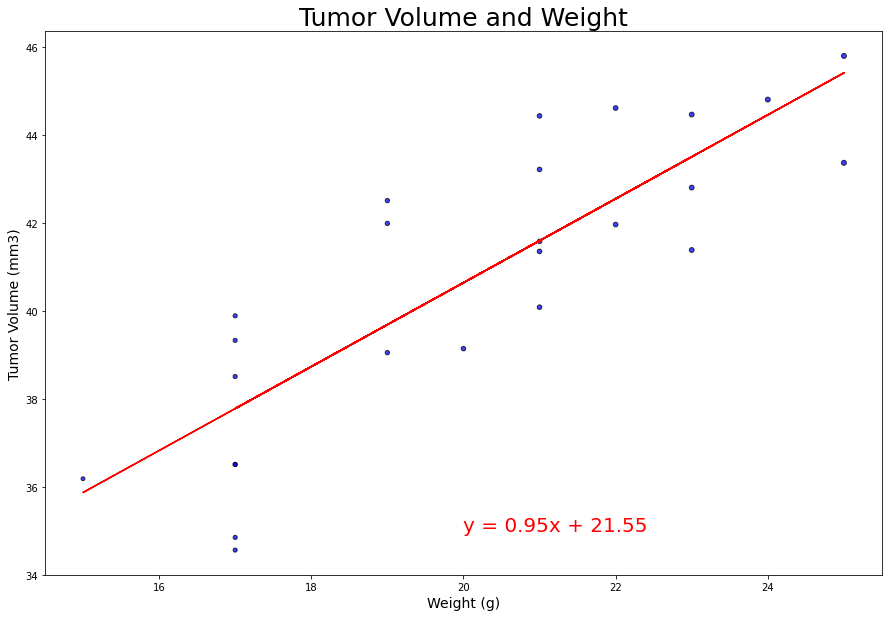

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_capm_vol["Weight (g)"]
y_values = avg_capm_vol["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter Plot
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Tumor Volume and Weight",fontsize =25)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=20,color="red")

print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")